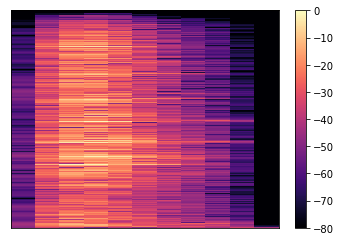

In [29]:
import librosa
import librosa.display

import numpy as np
import matplotlib.pyplot as plt

# from past.utils import old_div

y, sr = librosa.load("D:\Drum\HiHat\hat 2 SMOKE.wav")
#y, sr = librosa.load("D:\Drum\HiHat\!Hat 39.wav")

yt, index = librosa.effects.trim(y=y, top_db=30)

yt = librosa.util.normalize(yt)

D = librosa.stft(yt)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

In [30]:
S_db.shape

(1025, 11)

In [25]:
def trim(raw_audio, sr):
    '''
    Finds the first onset of the sound, returns a good start time and end time that isolates the sound
    :param raw_audio: np array of audio data, from librosa.load
    :param sr: sample rate
    :return: dict with 'start' and 'end', in seconds
    '''
    start = 0.0
    end = None

    # Add an empty second so that the beginning onset is recognized
    silence_to_add = 1.0
    raw_audio = np.append(np.zeros(int(silence_to_add * sr)), raw_audio)

    # Spectral flux
    hop_length = int(librosa.time_to_samples(1. / 200, sr=sr))
    onsets = librosa.onset.onset_detect(y=raw_audio, sr=sr, hop_length=hop_length, units='time')

    if len(onsets) == 0:
        return {'start': start, 'end': end}
    elif len(onsets) > 1:
        # If there are multiple onsets, cut it off just before the second one
        end = onsets[1] - (silence_to_add + 0.01)

    start = max(onsets[0] - (silence_to_add + 0.01), 0.0)
    return {'start': start, 'end': end}

In [28]:
trim(y, sr)

{'start': 0.027641723356009118, 'end': None}